In [18]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.layers import LSTM
from keras.backend import argmax
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.utils import to_categorical

In [19]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [20]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        #n=round((i / 6) % 24)
        n=((i) / 6) % 24
        #n=n/24
        dataY.append(n)
    return numpy.array(dataX), numpy.array(dataY)

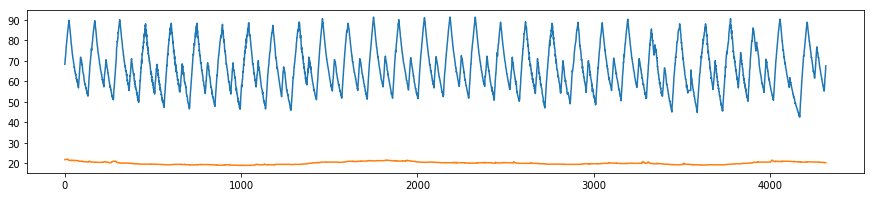

In [21]:
Pdataset = pandas.read_csv('piecstyczen.csv', usecols=[2,3], engine='python', skipfooter=3)
plt.figure(figsize=(15,3))
plt.plot(Pdataset)
plt.show()

In [22]:
Pdataset.tail(4)

,C1,C2
4313,63.50,20.3
4314,64.25,20.3
4315,66.25,20.3
4316,67.50,20.3


In [23]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(Pdataset)

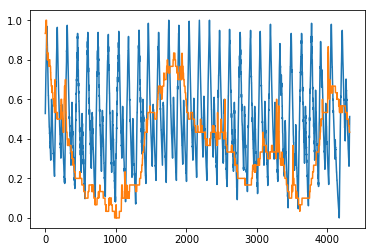

In [24]:
plt.plot(dataset)
plt.show()

In [25]:
dataset

array([[0.52820513, 0.93333333],
       [0.55384615, 0.93333333],
       [0.56923077, 0.93333333],
       ...,
       [0.44615385, 0.43333333],
       [0.48717949, 0.43333333],
       [0.51282051, 0.43333333]])

In [26]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

2892 1425


In [27]:
# reshape into X=t and Y=t+1
look_back = 60
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [28]:
train.shape

(2892, 2)

In [29]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [30]:
print(trainX.shape)
#dataset.shape
print(trainY.shape)
print(train.shape)

(2831, 1, 60)
(2831,)
(2892, 2)


<Figure size 1080x216 with 0 Axes>

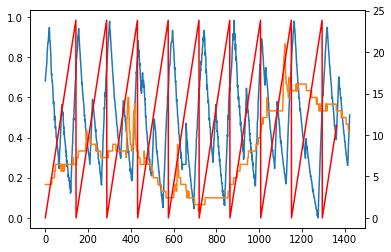

In [31]:
plt.figure(figsize=(15,3))

fig, ax1 = plt.subplots()


ax2 = ax1.twinx()
ax1.plot(test)

ax2.plot(testY,color="red")
plt.show()

In [32]:
trainY


array([ 0.        ,  0.16666667,  0.33333333, ..., 15.33333333,
       15.5       , 15.66666667])

In [33]:
#trainX.reshape(-1,4)

In [34]:
# create and fit the LSTM network
#https://github.com/ar-ms/lstm-mnist/blob/master/lstm_classifier.py
model = Sequential()
model.add(LSTM(105,  input_shape=(1, look_back)))
#model.add(Dense(30,activation="relu",input_dim=30))
model.add(Dropout(0.02))
#model.add(Dense(30,activation="relu"))
model.add(Dense(25,activation="softmax"))
#model.add(Dense(32, input_shape=(20,)))
#model.add(Activation('relu'))
#model.add(Dense(25, activation='relu'))
#model.compile(loss='mean_squared_error', optimizer='rmsprop')
trainYO = to_categorical(trainY, num_classes=25)
model.compile(loss='categorical_crossentropy',      optimizer='rmsprop',     metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 105)               69720     
_________________________________________________________________
dropout_2 (Dropout)          (None, 105)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 25)                2650      
Total params: 72,370
Trainable params: 72,370
Non-trainable params: 0
_________________________________________________________________


In [35]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

### Train the residual compressor
earlystopper = EarlyStopping(patience=5, verbose=1) 
checkpointer = ModelCheckpoint('VSB_classifier', verbose=1, save_best_only=True)
#results = class_model.fit(X, y, validation_split=0.2, batch_size=50, epochs=300, 
#                    callbacks=[earlystopper, checkpointer])
model.fit(trainX, trainYO, epochs=100, batch_size=1, verbose=2,callbacks=[earlystopper, checkpointer])

Epoch 1/100
 - 4s - loss: 2.0620 - acc: 0.3850
Epoch 2/100


/home/bartek/.local/lib/python3.5/site-packages/keras/callbacks.py:526: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: acc,loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
/home/bartek/.local/lib/python3.5/site-packages/keras/callbacks.py:435: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


 - 3s - loss: 1.3199 - acc: 0.6001
Epoch 3/100
 - 3s - loss: 0.9419 - acc: 0.6976
Epoch 4/100
 - 3s - loss: 0.7088 - acc: 0.7584
Epoch 5/100
 - 3s - loss: 0.5879 - acc: 0.7912
Epoch 6/100
 - 3s - loss: 0.5163 - acc: 0.8047
Epoch 7/100
 - 3s - loss: 0.4732 - acc: 0.8160
Epoch 8/100
 - 3s - loss: 0.4454 - acc: 0.8266
Epoch 9/100
 - 3s - loss: 0.4273 - acc: 0.8343
Epoch 10/100
 - 3s - loss: 0.4153 - acc: 0.8283
Epoch 11/100
 - 3s - loss: 0.4018 - acc: 0.8414
Epoch 12/100
 - 3s - loss: 0.4004 - acc: 0.8428
Epoch 13/100
 - 3s - loss: 0.3802 - acc: 0.8534
Epoch 14/100
 - 3s - loss: 0.3807 - acc: 0.8513
Epoch 15/100
 - 3s - loss: 0.3831 - acc: 0.8467
Epoch 16/100
 - 3s - loss: 0.3701 - acc: 0.8499
Epoch 17/100
 - 3s - loss: 0.3653 - acc: 0.8541
Epoch 18/100
 - 3s - loss: 0.3600 - acc: 0.8605
Epoch 19/100
 - 3s - loss: 0.3629 - acc: 0.8531
Epoch 20/100
 - 3s - loss: 0.3586 - acc: 0.8520
Epoch 21/100
 - 3s - loss: 0.3507 - acc: 0.8612
Epoch 22/100
 - 3s - loss: 0.3594 - acc: 0.8509
Epoch 23/100

In [53]:
score = model.evaluate(trainX, trainYO, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])


2831/2831 [==============================] - 0s 46us/step
Test loss: 0.2656246195229824
Test accuracy: 0.8961497704202065


In [54]:
# make predictions
trainPredict1 = model.predict(trainX)
testPredict1 = model.predict(testX)
trainPredict1

array([[9.71446991e-01, 2.98695965e-03, 9.28951795e-06, ...,
        5.16109458e-06, 2.55419146e-02, 1.44587389e-07],
       [9.91873682e-01, 4.44094092e-03, 1.14071818e-05, ...,
        1.14890599e-06, 3.66345630e-03, 9.97824543e-08],
       [9.86940563e-01, 1.19114863e-02, 4.64145451e-05, ...,
        4.89502270e-07, 1.08864380e-03, 8.68245351e-08],
       ...,
       [5.41766610e-13, 1.87218782e-17, 1.03343155e-24, ...,
        6.31815889e-13, 1.10447783e-10, 2.36459181e-13],
       [5.44779011e-13, 2.67556317e-17, 4.19260244e-24, ...,
        9.02808969e-13, 1.71353931e-10, 1.81102962e-13],
       [1.45237457e-12, 8.63998157e-17, 3.99511884e-23, ...,
        4.18869323e-12, 7.05610514e-10, 3.66248319e-13]], dtype=float32)

In [55]:
#softmax(trainPredict)
trainPredict=numpy.argmax(trainPredict1,1)
testPredict=numpy.argmax(testPredict1,1)
trainPredict

array([ 0,  0,  0, ..., 15, 15, 15])

In [56]:
# invert predictions
#trainPredict = scaler.inverse_transform(trainPredict)
#trainY = scaler.inverse_transform([trainY])
#testPredict = scaler.inverse_transform(testPredict)
#testY = scaler.inverse_transform([testY])

In [57]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.3f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.3f RMSE' % (testScore))

Train Score: 2.600 RMSE
Test Score: 6.121 RMSE


(4317, 2)


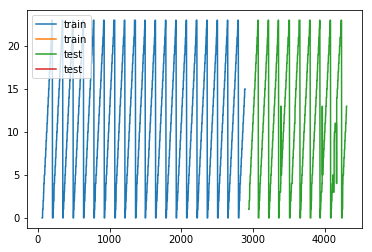

In [58]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
print(trainPredictPlot.shape)
trainPredictPlot[look_back:len(trainPredict)+look_back, 0] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)-7:len(dataset)-9, 0] = testPredict
# plot baseline and predictions
#plt.plot(scaler.inverse_transform(dataset),label="set")
plt.plot(trainPredictPlot,label="train")
plt.plot(testPredictPlot,label="test")
plt.legend()
plt.show()

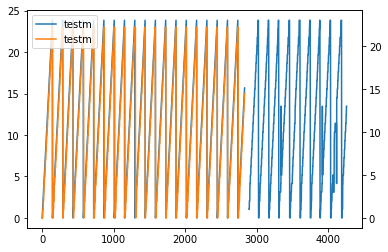

In [59]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
wws=2;
trainPredictPlot[wws:len(trainPredict)+wws,0] = trainPredict
wws=60
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+wws+1:len(dataset)-look_back-1, 0] = testPredict
# plot baseline and predictions

fig, ax1 = plt.subplots()


ax2 = ax1.twinx()
ax1.plot(trainY,label="set")
ax1.plot(trainPredictPlot,label="train")
ax2.plot(testPredictPlot,label="testm")
#plt.figure(figsize=(15,3))

plt.legend()
plt.show()